In [63]:
%matplotlib inline

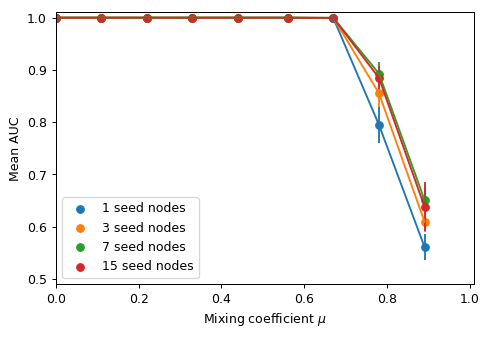

In [66]:
import json
from matplotlib import pyplot as plt
import glob
import numpy as np
import pandas as pd
rows = []
n = 1000

for f in glob.glob("hpc_results/lfr_no_overlap_{}/*.json".format(n)):
    with open(f) as jf:
        rts = json.load(jf)
        for row in rts:
            rows.append(row)

df = pd.DataFrame(rows, columns=['n', 'mixing', 'seed', 'c', 'seed_size', 'comm', 'auc', 'auc_std'])

fig, ax = plt.subplots()
fig.set_dpi(90)
ax.set_ylabel("Mean AUC")
ax.set_xlabel("Mixing coefficient $\mu$")
ax.set_ylim(0.49, 1.01)
ax.set_xlim(0.0, 1.01)
x_vals = df['mixing'].unique()
x_vals.sort()
seed_sizes = [1, 3, 7, 15]
for s in seed_sizes:
    y_vals = []
    y_err = []
    sdf = df.loc[df['seed_size'] == s]
    for x in x_vals:
        m = sdf.loc[sdf['mixing'] == x]["auc"].mean()
        y_vals.append(m)
        std = sdf.loc[sdf['mixing'] == x]["auc_std"].std()
        y_err.append(std)
    ax.scatter(x_vals,  y_vals, label="{} seed nodes".format(s))
    ax.errorbar(x_vals, y_vals, yerr=y_err)

ax.legend(loc=3)
fig.savefig("figs/lfr_binary_mo_overlap_auc_{}.eps".format(n))
fig.savefig("figs/lfr_binary_mo_overlap_auc_{}.svg".format(n))
fig.savefig("figs/lfr_binary_mo_overlap_auc_{}.png".format(n))